In [1]:
import numpy as np
import pandas as pd
import os
import keras
from keras.callbacks import ModelCheckpoint,EarlyStopping
from datetime import datetime
from tensorflow.keras import layers,models 
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

In [2]:
# # use for google Colab

# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# use for google Colab
!ls /content/drive/MyDrive/Regex_CNN_Project/dataset # check the folder TRAIN and TEST show using ls / dir  

TEST  TRAIN


In [4]:
# use for google Colab
!cd /content/drive/MyDrive/Regex_CNN_Project

In [7]:
data_dir = '/content/drive/MyDrive/Regex_CNN_Project/dataset/' # use for google Colab
# data_dir = './dataset/'
train_dir = data_dir + 'TRAIN'
test_dir = data_dir + 'TEST'
# parameters
img_width, img_height = 224, 224  # dimensions to which the images will be resized
batch_size = 32
num_classes = 6  #categories of trash

In [8]:
from keras_preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True,rotation_range=30)
test_data_gen = ImageDataGenerator(rescale=1.0/255)

In [9]:
train_data = train_data_gen.flow_from_directory(train_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical",subset='training')

valid_data = train_data_gen.flow_from_directory(train_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical",subset='validation')

test_data = test_data_gen.flow_from_directory(test_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical")


Found 1603 images belonging to 6 classes.
Found 398 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [10]:
labels = (train_data.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [13]:
train_data.image_shape

51

In [14]:
def timer(start_time=None):
    if not start_time:
        print(datetime.now())
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [16]:
model= models.Sequential()

model.add(layers.Conv2D(128,(3,3), padding='same',activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Conv2D(256,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation='relu'))

model.add(layers.Dropout(0.2))
model.add(layers.Dense(6,activation='softmax'))

filepath="trained_seq_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 256)     295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)      

In [18]:
from keras import optimizers
opt = optimizers.Adam(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer =opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [19]:
train_data.image_shape

(224, 224, 3)

In [22]:
filepath= data_dir + "trained_seq_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [23]:
start_time=timer(None)
result = model.fit(train_data, epochs=100, steps_per_epoch= 51, batch_size=32, validation_data=valid_data, callbacks=callbacks_list)
timer(start_time)

2021-07-29 03:40:19.722272
Epoch 1/100
51/51 [==============================] - 38s 750ms/step - loss: 0.9066 - accuracy: 0.6631 - val_loss: 1.1058 - val_accuracy: 0.6206

Epoch 00001: val_accuracy improved from -inf to 0.62060, saving model to /content/drive/MyDrive/Regex_CNN_Project/dataset/trained_seq_model.h5
Epoch 2/100
51/51 [==============================] - 38s 739ms/step - loss: 0.8943 - accuracy: 0.6781 - val_loss: 1.0668 - val_accuracy: 0.6156

Epoch 00002: val_accuracy did not improve from 0.62060
Epoch 3/100
51/51 [==============================] - 38s 744ms/step - loss: 0.9215 - accuracy: 0.6694 - val_loss: 1.0788 - val_accuracy: 0.6005

Epoch 00003: val_accuracy did not improve from 0.62060
Epoch 4/100
51/51 [==============================] - 38s 745ms/step - loss: 0.9079 - accuracy: 0.6737 - val_loss: 1.0432 - val_accuracy: 0.6307

Epoch 00004: val_accuracy improved from 0.62060 to 0.63065, saving model to /content/drive/MyDrive/Regex_CNN_Project/dataset/trained_seq_mod

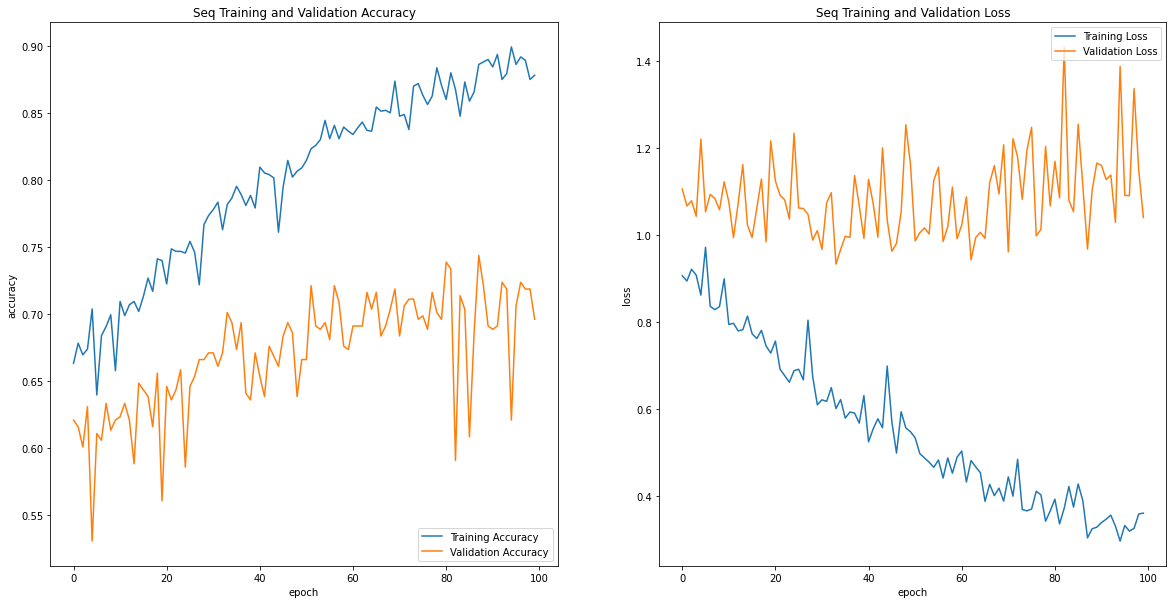

In [24]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Seq Training and Validation Accuracy")
plt.plot(result.history["accuracy"], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.plot( result.history["loss"], label='Training Loss')
plt.plot( result.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Seq Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [25]:
filepath= data_dir + "trained_seq_model_64.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [26]:
start_time=timer(None) # batchsize 64
result = model.fit(train_data, epochs=100, steps_per_epoch= 51, batch_size=64, validation_data=valid_data, callbacks=callbacks_list)
timer(start_time)

2021-07-29 04:42:21.118754
Epoch 1/100
51/51 [==============================] - 37s 721ms/step - loss: 0.3041 - accuracy: 0.9039 - val_loss: 1.0272 - val_accuracy: 0.7211

Epoch 00001: val_accuracy improved from -inf to 0.72111, saving model to /content/drive/MyDrive/Regex_CNN_Project/dataset/trained_seq_model_64.h5
Epoch 2/100
51/51 [==============================] - 36s 712ms/step - loss: 0.2939 - accuracy: 0.8983 - val_loss: 1.1048 - val_accuracy: 0.7412

Epoch 00002: val_accuracy improved from 0.72111 to 0.74121, saving model to /content/drive/MyDrive/Regex_CNN_Project/dataset/trained_seq_model_64.h5
Epoch 3/100
51/51 [==============================] - 36s 705ms/step - loss: 0.2742 - accuracy: 0.9064 - val_loss: 1.1301 - val_accuracy: 0.7186

Epoch 00003: val_accuracy did not improve from 0.74121
Epoch 4/100
51/51 [==============================] - 36s 712ms/step - loss: 0.2805 - accuracy: 0.9070 - val_loss: 1.0895 - val_accuracy: 0.7111

Epoch 00004: val_accuracy did not improve f

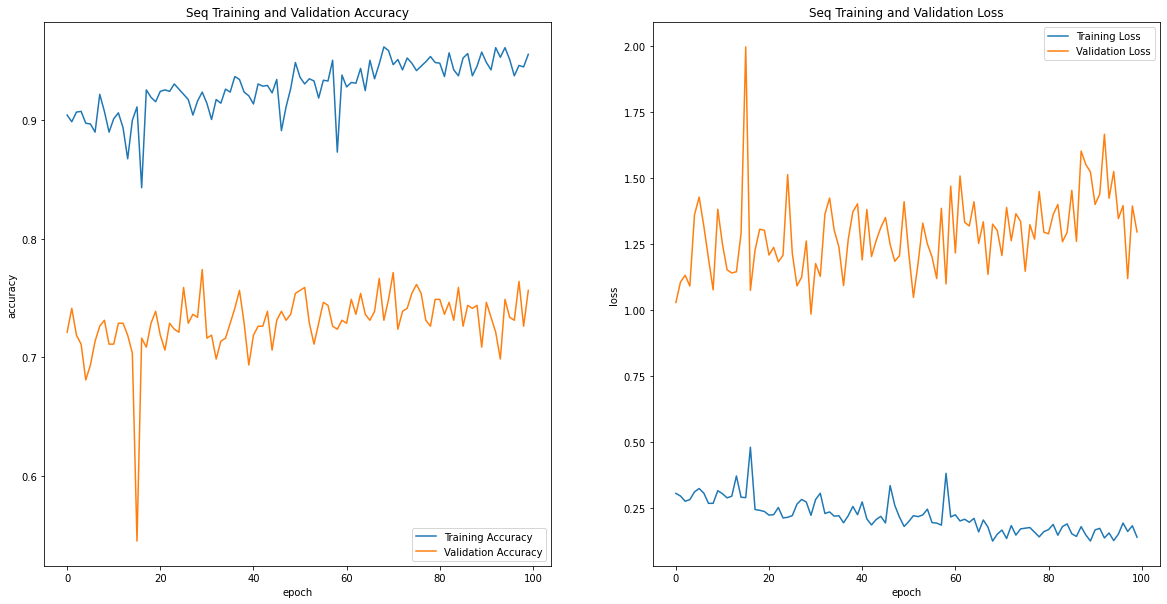

In [27]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Seq Training and Validation Accuracy")
plt.plot(result.history["accuracy"], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.plot( result.history["loss"], label='Training Loss')
plt.plot( result.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Seq Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()